### Data Analysis and Visualization

After doing our web scraping of the first 200 news clips published in the month of May 2019 we want to answer some simple questions:

1. How many articles have no author or anonymous authors?
2. Do the anonymous authors post captions? 
3. How long are the articles published by the anonymous authors?
4. Do authors publish more than once?
5. Can we describe the type of articles authors usually publish

We import the pandas and numpy libries for data manipulation
Matplotlib for plotting graphs


In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

Read in the data that we scraped and stored in a CSV, note that this CSV uses the ```^``` to denote different columns, therefore when reading in the data we need to specify the seperator using the ```sep='^'``` attribute. 

In [22]:
df = pd.read_csv('2019-05-01-200.csv', sep='^')

We then explore the data using ```df.head()``` to get a feel of the general data

In [44]:
df.head()

,Unnamed: 0,article_text,author,caption,dateCreated,imgUrl,title,url
0,0,Kwame Laurence will be in action for One Carib...,undefined,undefined,2019-05-20 18:57:54,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",OCMs Laurence defends AIPS titles\n,/sports/ocm-s-laurence-defends-aips-titles/art...
1,1,A Jamaican man is the second person to be char...,undefined,\n\nChargedJunior Thompson\n\n,2019-05-20 18:57:58,https://bloximages.newyork1.vip.townnews.com/t...,Charged with killing wife's ex-boyfriend\n,/news/local/charged-with-killing-wife-s-ex-boy...
2,2,POLICE believe that burglars killed a 74-year-...,Gyasi Gonzales,\n\nFound deadGemma Khan\n\n,2019-05-20 18:58:01,https://bloximages.newyork1.vip.townnews.com/t...,74-year-old Gemma killed by burglarsay cops\n,/news/local/year-old-gemma-killed-by-burglar-s...
3,3,In his bid to escape after raping a coconut ve...,Susan Mohammed,undefined,2019-05-20 18:58:03,https://bloximages.newyork1.vip.townnews.com/t...,Coconut vendor rapist makes escape by sea\n,/news/local/coconut-vendor-rapist-makes-escape...
4,4,Tobago Divisional officers destroyed what they...,undefined,undefined,2019-05-20 18:58:10,https://bloximages.newyork1.vip.townnews.com/t...,Ganja farmer loses crop in Tobago\n,/news/local/ganja-farmer-loses-crop-in-tobago/...


#### Question 1: How many articles have no author or anonymous authors?

In [24]:
anon = df[df['author'] == 'undefined']

In [25]:
anon.count()

Unnamed: 0      38
article_text    38
author          38
caption         38
dateCreated     38
imgUrl          38
title           38
url             38
dtype: int64

#### Question 2: Do the anonymous authors post captions?

In [30]:
anon_capt = anon[anon['caption'] == 'undefined']

In [31]:
anon_capt.count()

Unnamed: 0      21
article_text    21
author          21
caption         21
dateCreated     21
imgUrl          21
title           21
url             21
dtype: int64

#### Question 3: How long are the articles published by the anonymous authors?

In [32]:
anon_capt['article_len'] = anon_capt['article_text'].apply(lambda x : len(x))

/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We will use the ```describe()``` function to give us a summary of the article lengths

In [39]:
anon_capt['article_len'].describe()

count      21.000000
mean      939.380952
std       897.969180
min       434.000000
25%       525.000000
50%       606.000000
75%       702.000000
max      3173.000000
Name: article_len, dtype: float64

We will then use ```matplotlib```'s ```.hist()``` to determine the general buckets that the articles are in by article length.

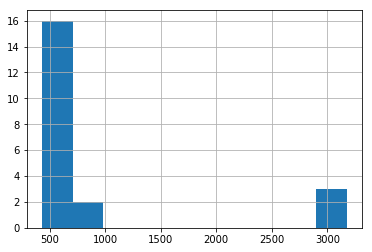

In [37]:
anon_capt['article_len'].hist()

In [55]:
# for text in anon_capt.loc[anon_capt['article_len'] > 600, 'article_text']:
#     print(text)
#     print("\n")

THE Governments penchant simply to announce fait accompli decisions without public input and with minimum information was again on display last week.First, at a reception for a delegation from Shanghai, China, Port of Spain Mayor Joel Martinez announced that the main business section of Charlotte Street, from Park Street to Independence Square, is to be officially designated Chinatown. Next came an announcement from Housing Minister Edmund Dillon that the Government has contracted Chinese firm, China Gezhouba International Engineering Company Ltd (CGGC), to build about 5,000 housing units across the country, beginning with 204 low to mid-income apartments at South Quay, Port of Spain and another 235 at Lady Hailes Avenue in San Fernando.Apart from the sparse information provided in the announcements, the public knows nothing about either project. In the case of the housing contract no details were provided on whether it went out for tender, how the expansion of housing further south of

#### Question 4: Do authors publish more than once?

In [56]:
# get all unique authors for articles with authors
auth = df[df['author'] != 'undefined']

In [112]:
# determine how many rows are there
auth.shape

(62, 8)

In [60]:
# Calling the unique function gets all the unique author names
all_authors = auth['author'].unique()

In [62]:
# we see only 36 authors out of 62 articles therefore there must be repeated authors
len(all_authors)

36

In [63]:
all_authors

array(['Gyasi Gonzales', 'Susan Mohammed', 'Carolyn Kissoon',
       'Alexander Bruzual', 'Rickie Ramdass', 'Nikita Braxton-Benjamin',
       'Leana Huntley', 'Barbara Gloudon', 'Peter Espeut',
       'Kwame Laurence', 'Ian Prescott', 'Fazeer Mohammed',
       'Shammi Kowlessar', 'Anna Ramdass', 'Camille Hunte',
       'Elizabeth Williams', 'Mark Meredith ', 'Michael Mondezie',
       'Kimberly Wallace', 'Ralph Maraj', 'Martin Daly', 'Lennox Grant',
       'Sophia K Chote SC', 'Selwyn Cudjoe', 'Michelle Loubon',
       'David Billington', 'Roger Seepersad', 'Leah Sorias', 'Ria Taitt',
       'David Jessop', 'Vaneisa Baksh', 'Mary King', 'Brandpoint (BPT)',
       'Media Release', 'Kimoy Leon Sing', 'Kim Boodram'], dtype=object)

To get a better view of the authors frequency we create a list of the frequencies of each author. Using that list and the list of name we will then create a DataFrame and finally do a bar plot of the top 5 publishers. 

In [87]:
freq = []
for author in all_authors:
    freq.append(auth[auth['author'] == author].count()[1])

In [105]:
authors = pd.DataFrame({"names":all_authors, "freq":freq}) 
authors.sort_values(by=['freq'], ascending=False, inplace=True)

<Container object of 5 artists>

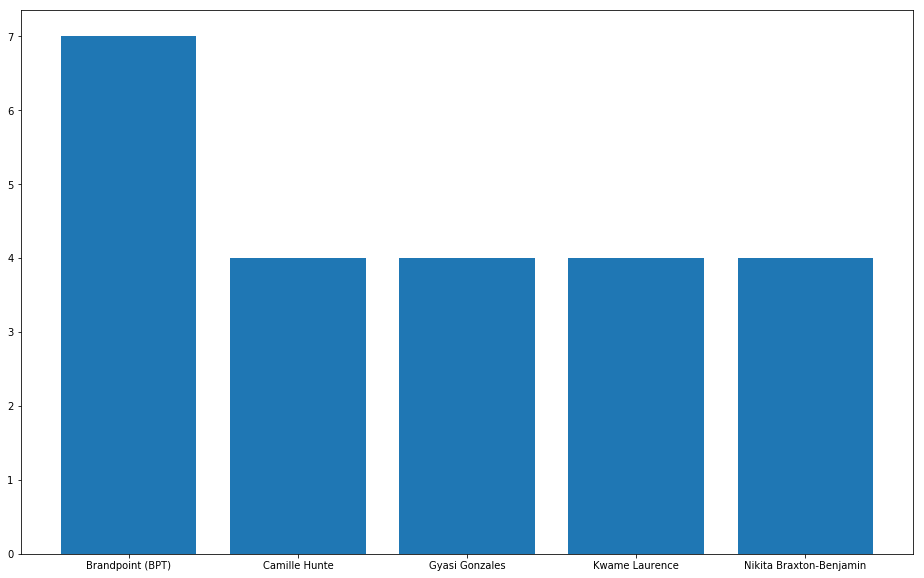

In [111]:
fig= plt.figure(figsize=(16,10))
plt.bar(authors['names'].head(), authors['freq'].head())

In [113]:
# for text in auth.loc[auth['author'] =='Brandpoint (BPT)', 'article_text']:
#     print(text)
#     print("\n")

(BPT) - Playing video games is not simply entertainment or an escape for middle school girls; it can be a confidence booster. The best games offer intellectual challenges, social interaction and a creative outlet. These games provide opportunities for young women to problem solve, be part of a group, express themselves and find their voice.For many tween/teen girls, gaming can be a star with many points, says Taina Maln of Star Stable, an online multi-player PC game designed for Gen Z girls. For some, a game can be about storytelling and adventure; for some, its about caretaking; for some, its about hobbies; for some, its about sport and competition; for some, its about socializing. For all, its about self-expression  about simultaneously fitting in and standing out.Here are five features and characteristics to consider when choosing video games for a tween or teen girl:1) Find games that challenge her to think.Games involving problem-solving help girls feel a sense of accomplishment. 